# Imports

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.impute import SimpleImputer
from sklearn.model_selection import StratifiedShuffleSplit
from pandas.plotting import scatter_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score 
from joblib import dump, load

# -------------------------------------------
# Data Preprocessing
# -------------------------------------------


In [2]:
# Load the housing data
housing = pd.read_csv("HousingData.csv")

# Train-Test Splitting
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

# Removing NaN values
imputer = SimpleImputer(strategy="median")
imputer.fit(housing)
x = imputer.transform(housing)
housing_tr = pd.DataFrame(x, columns=housing.columns)
housing.fillna(housing.mean(), inplace=True)

# Stratified Shuffle Split
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]


# -----------------------------------------------------------------
# Data Visualization and Exploring Correlations  
# -----------------------------------------------------------------


<AxesSubplot:xlabel='TAXRM', ylabel='MEDV'>

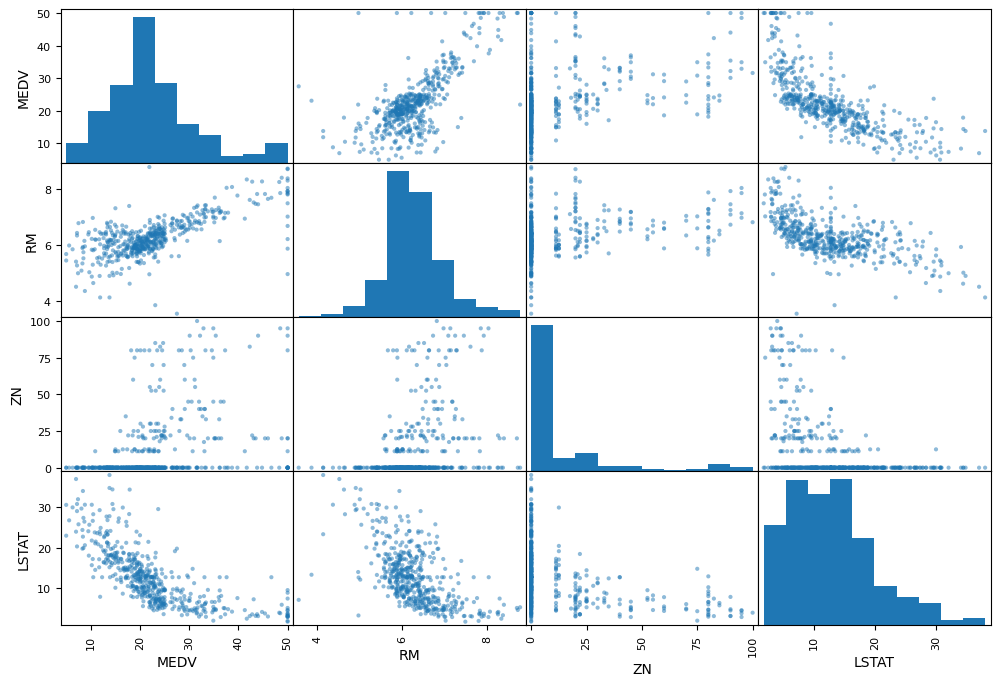

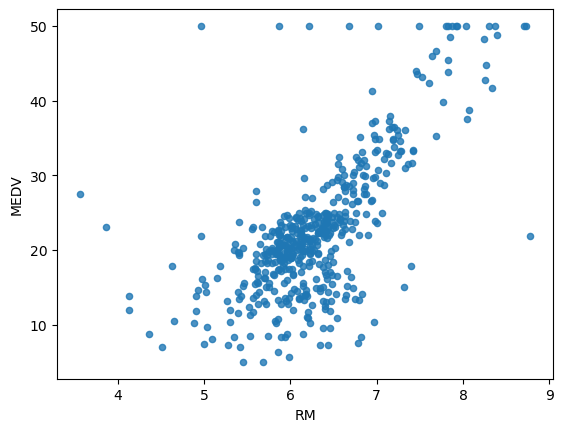

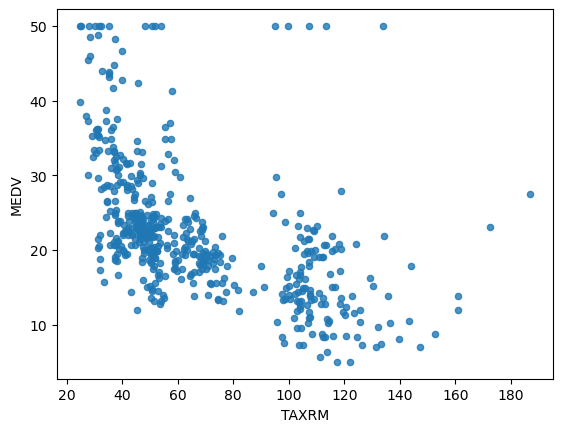

In [3]:
# Looking for correlations
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)
attributes = ["MEDV","RM","ZN","LSTAT"]
scatter_matrix(housing[attributes], figsize=(12, 8))
housing.plot(kind="scatter", x="RM", y="MEDV", alpha=0.8)
# Trying out attribute combinations
housing["TAXRM"] = housing["TAX"] / housing["RM"]
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)
housing.plot(kind="scatter", x="TAXRM", y="MEDV", alpha=0.8)

# -------------------------------------------
# Attribute Combinations
# -------------------------------------------


In [4]:
# Trying out attribute combinations
housing["TAXRM"] = housing["TAX"] / housing["RM"]

# -------------------------------------------
# Model Training and Evaluation
# -------------------------------------------

# Preparing the data for training
housing_labels = strat_train_set["MEDV"].copy()
housing = strat_train_set.drop("MEDV", axis=1)

# Creating a pipeline for data preprocessing
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

# Transforming numerical data using the pipeline
housing_num_tr = my_pipeline.fit_transform(housing)

# Selecting a desired model for Dragon Real Estate
model = RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)

# Evaluating the model using Cross-Validation
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

def print_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

print("Cross-Validation RMSE Scores:")
print_scores(rmse_scores)


Cross-Validation RMSE Scores:
Scores: [3.47070157 2.74782494 2.55674129 2.42366289 3.32159756 3.44344037
 3.9139678  3.37313161 3.25074164 2.9676889 ]
Mean: 3.1469498576330603
Standard deviation: 0.4400450468286009


# -------------------------------------------
# Saving the Model
# -------------------------------------------


In [5]:
# Saving the model
dump(model, 'Dragon.joblib')

['Dragon.joblib']

# -------------------------------------------
# Using the Model
# -------------------------------------------


In [6]:
# How to Use the Model
def predict_house_price(features):
    # Preparing the data for prediction
    prepared_data = my_pipeline.transform([features])

    # Predicting housing prices using the model
    model = load('Dragon.joblib')
    predicted_prices = model.predict(prepared_data)

    return predicted_prices[0]

# Example of using the model to predict a single house price
sample_features = [3.611874, 0.0, 2.46, 0.0, 0.488, 6.563, 95.6, 2.8470, 3, 193, 17.8, 396.90, 5.680]
predicted_price = predict_house_price(sample_features)
print("Predicted housing price for the given features:")
print(predicted_price)

Predicted housing price for the given features:
30.163


C:\Users\WELCOME\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
